<a href="https://colab.research.google.com/github/prikshit-2000/Machine-Learning-Assignments/blob/main/Time_Series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTM,Dense,Activation,Input
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,Model
%matplotlib inline
from sklearn.model_selection import train_test_split
np.random.seed(7)
from sklearn.metrics import mean_squared_error

In [286]:
!wget https://raw.githubusercontent.com/prvnktech/008-Stock-Price-Prediction-LSTM/master/apple_share_price.csv

--2021-12-28 04:41:33--  https://raw.githubusercontent.com/prvnktech/008-Stock-Price-Prediction-LSTM/master/apple_share_price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74117 (72K) [text/plain]
Saving to: ‘apple_share_price.csv.15’

apple_share_price.c 100%[===================>]  72.38K  --.-KB/s    in 0.001s  

2021-12-28 04:41:33 (49.8 MB/s) - ‘apple_share_price.csv.15’ saved [74117/74117]



In [287]:
df = pd.read_csv('/content/apple_share_price.csv',usecols = [1,2,3,4])
df = df.reindex(index = df.index[::-1])
df.head()

,Open,High,Low,Close
1663,46.52,47.18,46.41,47.08
1662,47.49,47.50,46.88,47.33
1661,47.08,47.76,47.07,47.71
1660,47.82,47.89,47.56,47.68
1659,47.71,48.05,47.41,48.02


In [288]:
df.shape

(1664, 4)

In [289]:
obs = np.arange(1,len(df)+1,1)

OHLC_avg = df.mean(axis = 1)
HLC_avg = df[['High','Low','Close']].mean(axis = 1) 
close_val = df[['Close']]


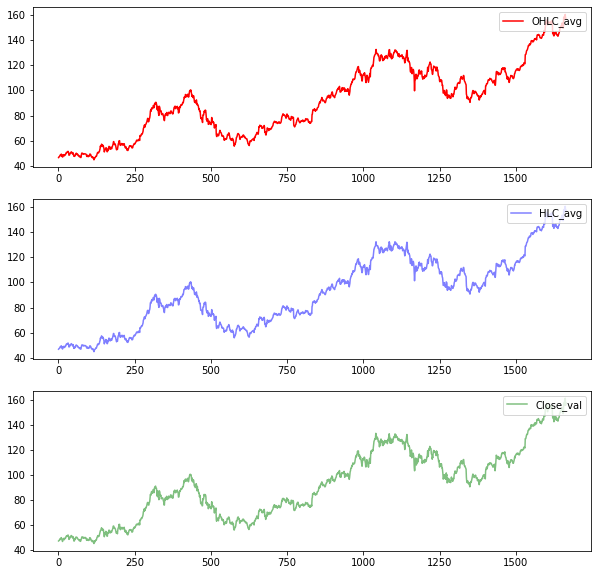

In [290]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
plt.plot(obs,OHLC_avg , 'r',label = 'OHLC_avg')
plt.legend(loc ='upper right')
plt.subplot(3,1,2)
plt.plot(obs,HLC_avg , 'b',label = 'HLC_avg',alpha = 0.5)
plt.legend(loc ='upper right')
plt.subplot(3,1,3)
plt.plot(obs,close_val , 'g' , label = 'Close_val',alpha = 0.5)
plt.legend(loc ='upper right')
plt.show()

In [291]:
OHLC_avg = np.reshape(OHLC_avg.values , (len(OHLC_avg),1))
scaler = MinMaxScaler(feature_range = (0,1))
OHLC_avg = scaler.fit_transform(OHLC_avg)


In [292]:
train_OHLC = int(len(OHLC_avg ) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]


In [293]:
train_OHLC.shape

(1248, 1)

In [294]:
def step_wise(dataset,step_size):
    X,y = [],[]
    for i in range(len(dataset) - step_size - 1):
        a = dataset[i:(i+step_size),0]
        X.append(a)
        b = dataset[i+step_size,0]
        y.append(b)
    return np.array(X),np.array(y)



In [295]:
train_x,train_y = step_wise(train_OHLC,1)
test_x , test_y = step_wise(test_OHLC,1)

In [296]:
train_x.shape,test_x.shape

((1246, 1), (414, 1))

In [297]:
train_y.shape,test_y.shape

((1246,), (414,))

In [298]:
model = Sequential([
                    LSTM(32,input_shape = (1,1),return_sequences = True),
                    LSTM(16),
                    Dense(1),
                    Activation('linear')
])

In [299]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam' )
model.fit(train_x,train_y,epochs = 10)

Epoch 1/10
39/39 [==============================] - 4s 5ms/step - loss: 0.1179
Epoch 2/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0223
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 6.9923e-04
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 5.5832e-04
Epoch 9/10
39/39 [==============================] - 0s 5ms/step - loss: 5.3661e-04
Epoch 10/10
39/39 [==============================] - 0s 5ms/step - loss: 5.1527e-04


In [300]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)


In [301]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_y = scaler.inverse_transform(train_y.reshape(-1,1))
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

In [302]:
from sklearn.metrics import mean_squared_error
print("Training RMSE score : " , np.sqrt(mean_squared_error(train_pred , train_y)))
print("Testing RMSE score : " , np.sqrt(mean_squared_error(test_pred, test_y)))

Training RMSE score :  2.5784170470069325
Testing RMSE score :  5.671326461961341


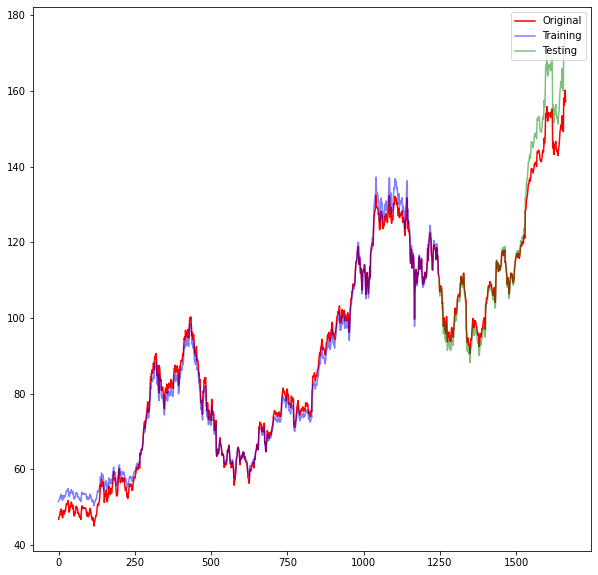

In [318]:
plt.figure(figsize = (10,10))
# plt.subplot(3,1,1)
plt.plot(scaler.inverse_transform(OHLC_avg) , 'r',label = 'Original')
# plt.legend(loc ='upper right')
# plt.subplot(3,1,2)
plt.plot(train_pred , 'b',label = 'Training',alpha = 0.5)
# plt.legend(loc ='upper right')
# plt.subplot(3,1,3)
plt.plot(np.array(range(int(len(OHLC_avg ) * 0.75),len(OHLC_avg)-2)),test_pred , 'g' , label = 'Testing',alpha = 0.5)
plt.legend(loc ='upper right')
plt.show()

In [319]:
test_pred[-1]

array([175.58142], dtype=float32)

In [330]:
last_val = test_pred[-1]
last_val_scaled = last_val/last_val

next_val = model.predict(np.reshape(last_val_scaled, (1,1)))

print ("Last Day Value:", (last_val).ravel())
print ("Next Day Value:", (last_val*next_val).ravel())

Last Day Value: [175.58142]
Next Day Value: [199.07524]
